# Import Dataset

In [1]:
#Import library pandas
import pandas as pd

#Import library numpy
import numpy as np

#Import library matplotlib dan seaborn untuk visualisasi
from matplotlib import pyplot as plt
import seaborn as sns

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import dataset Crop_recomendation.csv
dataset="Crop_recommendation.csv"
crop=pd.read_csv(dataset)

# Data Understanding

N - ratio of Nitrogen content in soil<br>
P - ratio of Phosphorous content in soil<br>
K - ratio of Potassium content in soil<br>
temperature - temperature in degree Celsius<br>
humidity - relative humidity in %<br>
ph - ph value of the soil<br>
rainfall - rainfall in mm

In [3]:
#Check head
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#Check tail
crop.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
#Check data types
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df: %d baris, %d kolom." % crop.shape)

Ukuran df: 2200 baris, 8 kolom.


In [8]:
#Describe data
crop.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jute
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [9]:
#Menghitung frekuensi pada kolom label
crop["label"].value_counts()

jute           100
mothbeans      100
banana         100
lentil         100
maize          100
mango          100
pigeonpeas     100
watermelon     100
kidneybeans    100
apple          100
grapes         100
cotton         100
mungbean       100
blackgram      100
chickpea       100
coconut        100
papaya         100
rice           100
muskmelon      100
coffee         100
pomegranate    100
orange         100
Name: label, dtype: int64

# Data Cleaning

In [10]:
#Check missing data
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

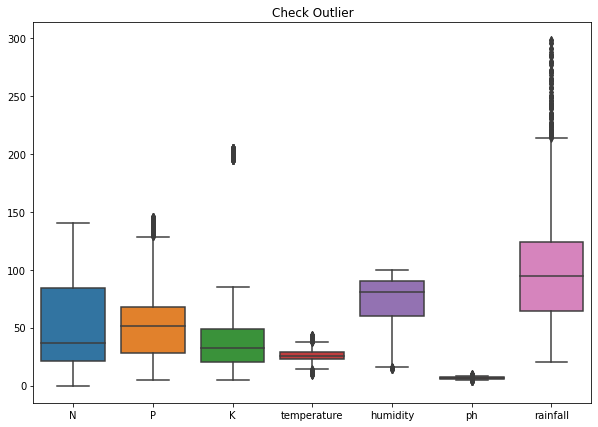

In [11]:
#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop).set_title("Check Outlier")
plt.show()

In [12]:
#Define fungsi untuk check outlier
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

#Define fungsi untuk remove outlier
def remove_outliers(df, x):
    return df.drop((detect_outliers(df, x)).index, axis=0)

In [13]:
print("Ukuran df sebelum: %d baris, %d kolom." % crop.shape)

Ukuran df sebelum: 2200 baris, 8 kolom.


<AxesSubplot:xlabel='P'>

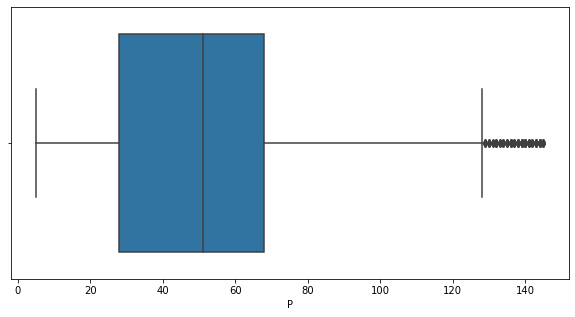

In [14]:
#Visualisasi boxplot kolom P
plt.figure(figsize =(10, 5))
sns.boxplot(crop['P'])

<AxesSubplot:xlabel='K'>

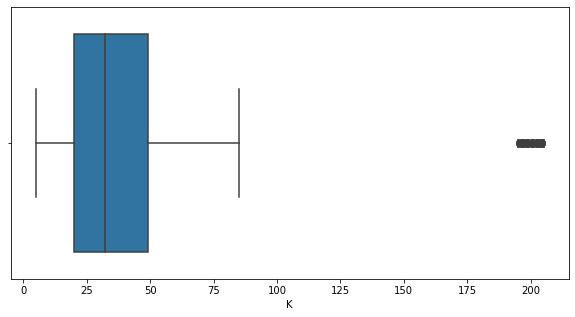

In [15]:
#Visualisasi boxplot kolom K
plt.figure(figsize =(10, 5))
sns.boxplot(crop['K'])

<AxesSubplot:xlabel='rainfall'>

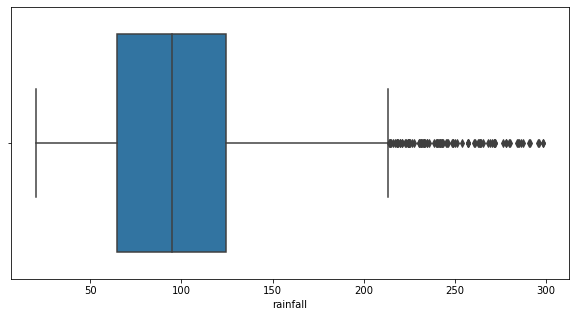

In [16]:
#Visualisasi boxplot kolom rainfall
plt.figure(figsize =(10, 5))
sns.boxplot(crop['rainfall'])

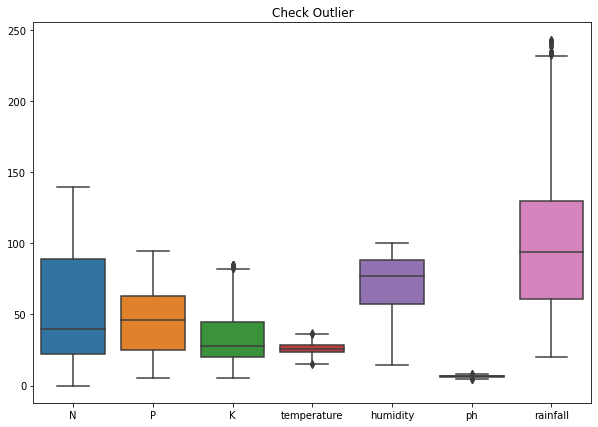

In [17]:
#Menghilangkan data outlier kolom P
crop=remove_outliers(crop,"P")

#Menghilangkan data outlier kolom K
crop=remove_outliers(crop,"K")

#Menghilangkan data outlier kolom rainfall
crop=remove_outliers(crop,"rainfall")

#Menghilangkan data outlier kolom temperature
crop=remove_outliers(crop,"temperature")

#Menghilangkan data outlier kolom ph
crop=remove_outliers(crop,"ph")

#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop).set_title("Check Outlier")
plt.show()

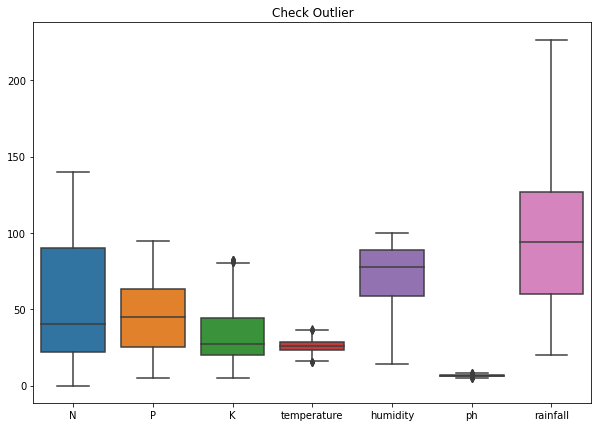

In [18]:
#Menghilangkan data outlier kolom K
crop=remove_outliers(crop,"K")

#Menghilangkan data outlier kolom rainfall
crop=remove_outliers(crop,"rainfall")
crop=remove_outliers(crop,"rainfall")
crop=remove_outliers(crop,"rainfall")
crop=remove_outliers(crop,"rainfall")

#Check outlier data dengan visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.boxplot(data=crop).set_title("Check Outlier")
plt.show()

In [19]:
#Hitung ukuran (jumlah baris dan kolom) dari dataset
print("Ukuran df sekarang: %d baris, %d kolom." % crop.shape)

Ukuran df sekarang: 1785 baris, 8 kolom.


# Data Visualization

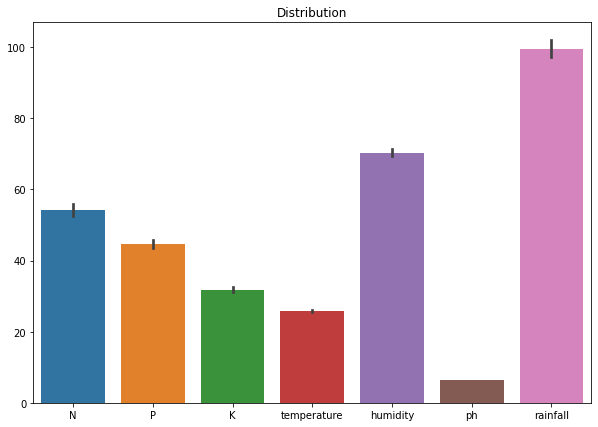

In [20]:
#Viasualisasi Barplot
plt.subplots(figsize=(10,7))
sns.barplot(data=crop).set_title("Distribution")
plt.show()

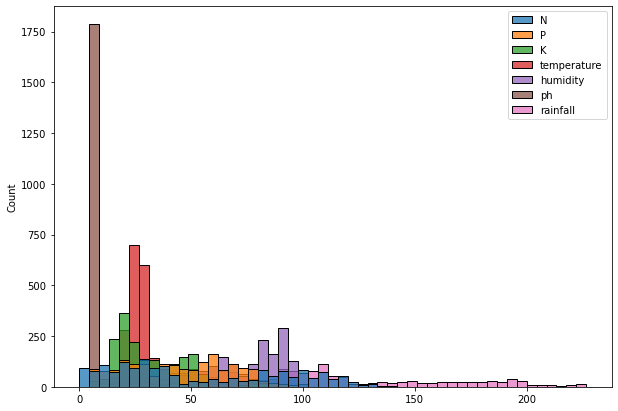

In [21]:
#Visualisasi Histogram
plt.subplots(figsize=(10,7))
sns.histplot(data=crop)
plt.show()

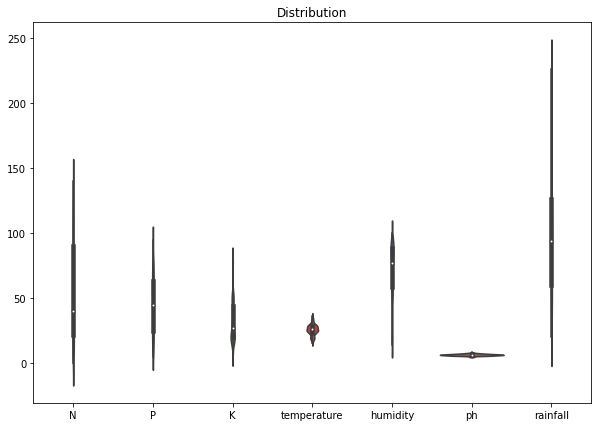

In [22]:
#Visualisasi boxplot
plt.subplots(figsize=(10,7))
sns.violinplot(data=crop).set_title("Distribution")
plt.show()

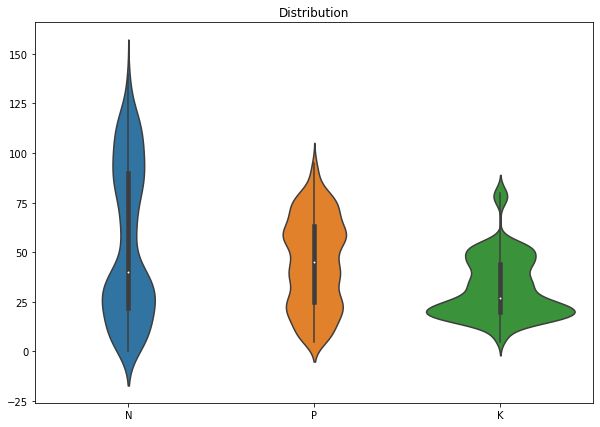

In [23]:
#Visualisasi violinplot untuk kolom N, P, K
plt.subplots(figsize=(10,7))
sns.violinplot(data=crop[["N","P","K"]]).set_title("Distribution")
plt.show()

Text(0.5, 1.0, 'Rainfall')

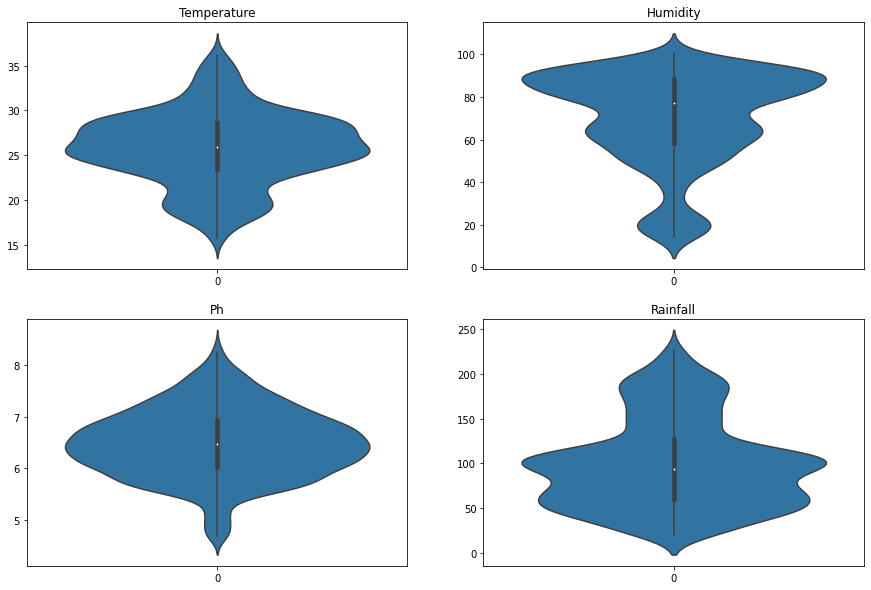

In [24]:
#Visualisasi violinplot untuk kolom temperature, humidity, Ph, Rainfall
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(data=crop["temperature"]).set_title("Temperature")
plt.subplot(2,2,2)
sns.violinplot(data=crop["humidity"]).set_title("Humidity")
plt.subplot(2,2,3)
sns.violinplot(data=crop["ph"]).set_title("Ph")
plt.subplot(2,2,4)
sns.violinplot(data=crop["rainfall"]).set_title("Rainfall")

In [25]:
#Melakukan describe data
crop.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,1785.00000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jute
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,54.27451,44.655462,31.849300,25.808975,70.309248,6.488060,99.524823,NaN
std,38.35794,22.616280,15.587962,4.100476,21.994252,0.671278,50.047544,NaN
min,0.00000,5.000000,5.000000,15.330426,14.258040,4.626212,20.211267,NaN
25%,22.00000,25.000000,20.000000,23.426116,58.525343,6.030447,59.844992,NaN
50%,40.00000,45.000000,27.000000,25.937302,77.342640,6.461619,94.002872,NaN
75%,90.00000,63.000000,44.000000,28.559810,88.483126,6.932537,126.673812,NaN


Text(0.5, 1.0, 'General Statistics of Iris Dataset')

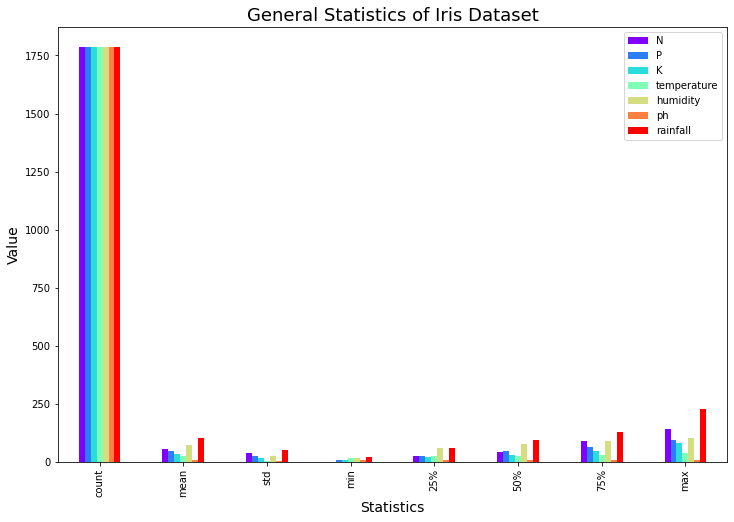

In [26]:
#Visualisasi describe
crop.describe().plot(kind = "bar", figsize = (12,8), colormap = "rainbow")
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Iris Dataset",fontsize=18)

# Data Correlation

In [27]:
#Check correlation
crop.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.078808,0.335052,-0.023279,0.256775,0.083841,-0.028949
P,-0.078808,1.000000,-0.051126,-0.082366,-0.476549,0.014521,-0.044729
K,0.335052,-0.051126,1.000000,-0.097396,0.045507,0.001906,-0.013604
temperature,-0.023279,-0.082366,-0.097396,1.000000,0.265825,-0.020859,-0.092427
humidity,0.256775,-0.476549,0.045507,0.265825,1.000000,0.108981,0.007112
ph,0.083841,0.014521,0.001906,-0.020859,0.108981,1.000000,-0.164274
rainfall,-0.028949,-0.044729,-0.013604,-0.092427,0.007112,-0.164274,1.000000


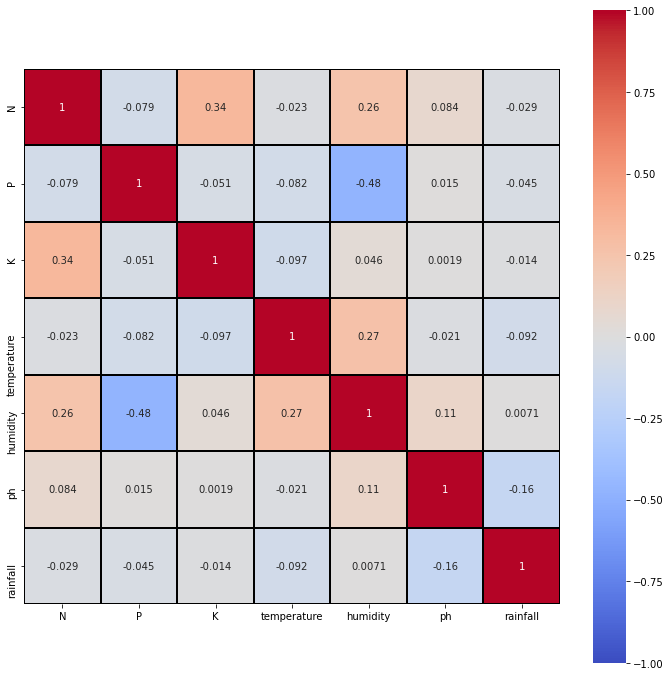

In [28]:
# lihat visualisasi korelasi dengan heatmap
fig=plt.gcf()
fig.set_size_inches(12,12)
fig=sns.heatmap(crop.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Data Train

In [29]:
#Membuat variabel fitur dan label
X=crop.drop(columns="label").values
y=crop["label"].values

In [30]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [31]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split


In [32]:
#Train and Test split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state = 0)

In [33]:
# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0

In [34]:
# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 

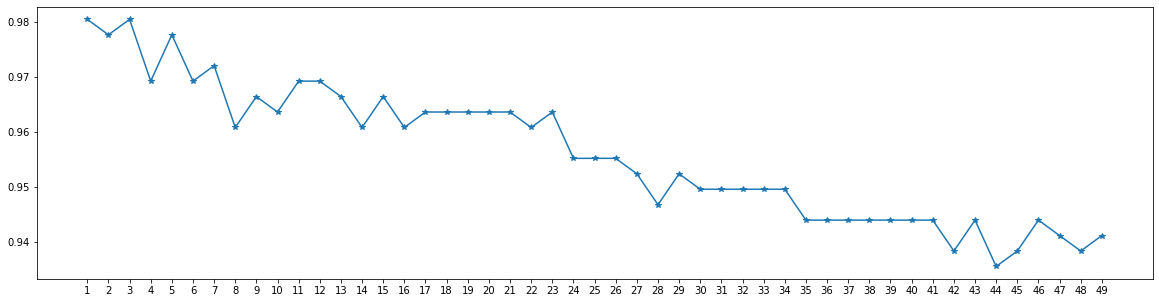

In [35]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

In [36]:
# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  

In [37]:
#Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC

linear_svc = SVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 

In [38]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


Confusion matrix for Random Forest
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0

In [39]:
# Import Library Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  3  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0 

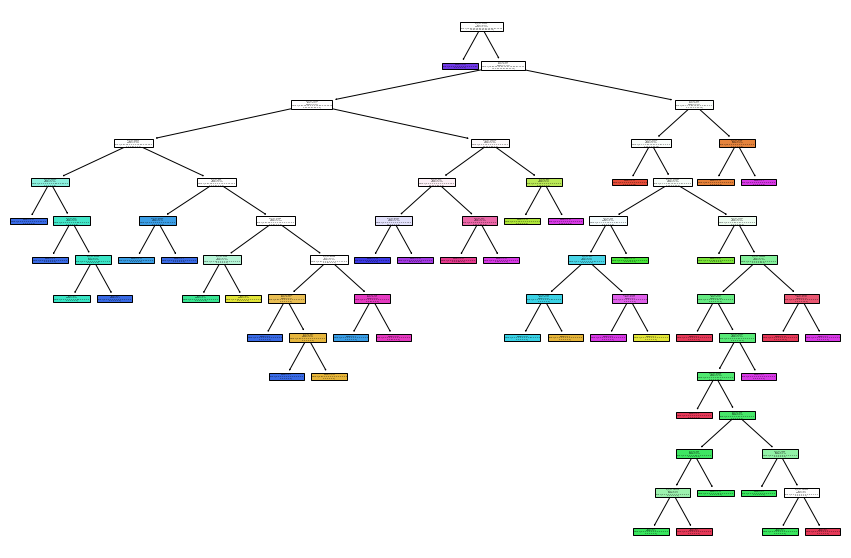

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree  ,filled=True)
plt.show()

In [41]:
#Modul terbaik
results = pd.DataFrame({
    'Model': ['KNN', 
              'Logistic Regression',
              'Naive Bayes',  
              'Support Vector Machine',
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_knn,
              acc_log,
              acc_gaussian,  
              acc_linear_svc,
              acc_random_forest,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_rf,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,99.72
1,Naive Bayes,99.30,98.60
2,KNN,98.88,98.04
3,Decision Tree,100.00,97.48
4,Support Vector Machine,97.20,97.20
5,Logistic Regression,97.55,96.64


# Deploy Model

In [42]:
import pickle

pickle.dump(logreg, open('crop_pred.pkl','wb'))